<a href="https://colab.research.google.com/github/Yoojinchon/Movie-Night-Recommender-Clustering-Based-Genre-Analysis/blob/main/Movie_Night_Recommender_Clustering_Based_Genre_Analysis_Clustirng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Night Recommender: Clustering-Based Genre Analysis

### What other movies would animation lovers watch?

# Objectives of the Project

What movies do you watch when you rest? If you watch a movie alone, it won't be hard to choose. But if you have to watch a movie with your friend? What if you have multiple friends? You'll have to consider other friends' tastes. In this situation, it would be a better choice to have no one offended by the chosen movie rather than pursuing extreme fun.

People who like animation have a prejudice that they don't enjoy movies that are scary and gross and require a lot of attention to watching. Let's find out what other movies people who enjoy animation like through the following process. Through this, we will be able to choose movies that are not liked or disliked by 'movie night for the Masters students'.

In [ ]:
pip install termcolor

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from termcolor import colored

from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.model_selection import train_test_split

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Data Exploration

In [ ]:
# read the csv file
df = pd.read_excel(r"C:\Users\user\Desktop\Assignment\Analytics Report 9 - Clustering\Class_2023_10_18__01_49_QZ_Movies Movies & Movies.xlsx")

In [ ]:
shape = df.shape
print('The dimention is :',shape)

The dimention is : (85, 17)


In [ ]:
# The columns names of the dataset
df.columns

Index(['Student Name',
       'Using a scale 1 to 10, how much do you like action movies? (use decimals, e.g. 4.2)',
       'Using a scale 1 to 10, how much do you like adventure movies? (use decimals, e.g. 4.2)',
       'Using a scale 1 to 10, how much do you like comedy movies? (use decimals, e.g. 4.2)',
       'Using a scale 1 to 10, how much do you like crime movies? (use decimals, e.g. 4.2)',
       'Using a scale 1 to 10, how much do you like drama movies?',
       'Using a scale 1 to 10, how much do you like fantasy movies?',
       'Using a scale 1 to 10, how much do you like science fiction movies?',
       'Using a scale 1 to 10, how much do you like horror movies?',
       'Using a scale 1 to 10, how much do you like mystery movies?',
       'Using a scale 1 to 10, how much do you like romance movies?',
       'Using a scale 1 to 10, how much do you like thriller movies?',
       'Using a scale 1 to 10, how much do you like documentary movies?',
       'Using a scale 1 to 10

In [ ]:
df.head()

,Student Name,"Using a scale 1 to 10, how much do you like action movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like adventure movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like comedy movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like crime movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like thriller movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like animated movies?","On average, how many movies you watch on a single week",Which of the following movies you'd say is your preferred?,Describe yourself with 5 adjectives. For example:- Capable- Friendly- Happy- Sociable- Slow
0,Aiman Anwer,7.5,6.5,8.5,8.5,10.0,10.0,3.5,1.5,8.5,9.5,9.5,1.5,4.5,C. 3) Two movies a week,D. Spiderman\nE. Mulan\nF. Hamilton\nG. Jurass...,- Friendly\n- Motivated\n- Sociable\n- Energet...
1,Aman,7,5,3.0,8.0,3.0,1.0,8.0,9.0,7.0,1.0,10.0,5.0,4.0,A. 1) zero movies. I don't watch movies,D. Spiderman,- Punctual\n- Disciplined \n- Introvert\n- Fas...
2,Aman Sran,4.6,7.4,10.0,8.7,7.5,3.2,3.4,4.5,8.5,6.7,8.4,9.5,2.4,B. 2) One movie a week,B. Shrek,"Sociable, Friendly, Empathetic, Passionate, Co..."
3,Amarthya,7,8,9.0,6.0,7.0,7.0,7.0,1.0,7.0,7.0,8.0,6.0,8.0,B. 2) One movie a week,G. Jurassic Park,AI-driven\nInformative\nMultifunctional\nnonch...
4,Ananta Verma,3.5,7.8,10.0,4.2,6.9,5.5,9.8,6.2,8.0,4.0,8.8,2.0,8.2,B. 2) One movie a week,D. Spiderman,-calm\n-kind\n-introvert\n-passionate\n-funny


In [ ]:
# Understand the data type and information
# It has 17 coulmns in the dataframe, and data type is string.
# using a scale 0 to 10.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 17 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Student Name                                                                                 85 non-null     object 
 1   Using a scale 1 to 10, how much do you like action movies? (use decimals, e.g. 4.2)          85 non-null     object 
 2   Using a scale 1 to 10, how much do you like adventure movies? (use decimals, e.g. 4.2)       84 non-null     object 
 3   Using a scale 1 to 10, how much do you like comedy movies? (use decimals, e.g. 4.2)          83 non-null     float64
 4   Using a scale 1 to 10, how much do you like crime movies? (use decimals, e.g. 4.2)           83 non-null     float64
 5   Using a scale 1 to 10, how much do you

In [ ]:
df.describe()

,"Using a scale 1 to 10, how much do you like comedy movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like crime movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like thriller movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like animated movies?"
count,83.000000,83.000000,83.000000,82.000000,82.000000,82.000000,81.000000,82.000000,81.000000,82.000000,81.000000
mean,8.423240,1212.749639,6.855301,7.271220,8.387195,6.748170,7.993827,7.184390,20.445556,6.590122,7.052963
std,1.542735,10975.545086,2.331890,2.351857,1.794819,2.947948,1.817835,3.123678,110.221002,2.497070,2.567645
min,3.000000,2.500000,2.200000,0.000000,2.000000,0.000000,1.200000,-10.000000,1.000000,1.000000,0.000000
25%,7.900000,7.250000,5.000000,6.275000,8.000000,5.000000,7.500000,6.125000,7.800000,5.000000,5.000000
50%,8.900000,8.500000,7.000000,7.750000,8.800000,7.550000,8.250000,7.850000,9.000000,7.000000,7.900000
75%,9.950000,9.900000,8.550000,9.000000,9.875000,9.000000,9.000000,9.425000,10.000000,8.150000,9.000000
max,10.000000,100000.000000,12.000000,10.000000,11.000000,10.000000,10.000000,10.000000,1000.000000,10.000000,10.500000


# Data cleaning

In [ ]:
#missing values anlysis
df.isnull().sum()

Student Name                                                                                   0
Using a scale 1 to 10, how much do you like action movies? (use decimals, e.g. 4.2)            0
Using a scale 1 to 10, how much do you like adventure movies? (use decimals, e.g. 4.2)         1
Using a scale 1 to 10, how much do you like comedy movies? (use decimals, e.g. 4.2)            2
Using a scale 1 to 10, how much do you like crime movies? (use decimals, e.g. 4.2)             2
Using a scale 1 to 10, how much do you like drama movies?                                      2
Using a scale 1 to 10, how much do you like fantasy movies?                                    3
Using a scale 1 to 10, how much do you like science fiction movies?                            3
Using a scale 1 to 10, how much do you like horror movies?                                     3
Using a scale 1 to 10, how much do you like mystery movies?                                    4
Using a scale 1 to 10, how muc

In [ ]:
# no duplicated rows
df.duplicated().sum()

0

In [ ]:
# delete the outlier
import pandas as pd
import numpy as np

df = pd.read_excel(r"C:\Users\user\Desktop\Assignment\Analytics Report 9 - Clustering\Class_2023_10_18__01_49_QZ_Movies Movies & Movies.xlsx")

columns_to_check = df.columns[1:13]

# change to Nan
for column in columns_to_check:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# delete the row included Nan
df.dropna(inplace=True)

print(df.head())


   Student Name  \
0   Aiman Anwer   
1          Aman   
2     Aman Sran   
3      Amarthya   
4  Ananta Verma   

   Using a scale 1 to 10, how much do you like action movies? (use decimals, e.g. 4.2)  \
0                                                7.5                                     
1                                                7.0                                     
2                                                4.6                                     
3                                                7.0                                     
4                                                3.5                                     

   Using a scale 1 to 10, how much do you like adventure movies? (use decimals, e.g. 4.2)  \
0                                                6.5                                        
1                                                5.0                                        
2                                                7.4             

# Dendrogram

In [ ]:
df.columns

Index(['Student Name',
       'Using a scale 1 to 10, how much do you like action movies? (use decimals, e.g. 4.2)',
       'Using a scale 1 to 10, how much do you like adventure movies? (use decimals, e.g. 4.2)',
       'Using a scale 1 to 10, how much do you like comedy movies? (use decimals, e.g. 4.2)',
       'Using a scale 1 to 10, how much do you like crime movies? (use decimals, e.g. 4.2)',
       'Using a scale 1 to 10, how much do you like drama movies?',
       'Using a scale 1 to 10, how much do you like fantasy movies?',
       'Using a scale 1 to 10, how much do you like science fiction movies?',
       'Using a scale 1 to 10, how much do you like horror movies?',
       'Using a scale 1 to 10, how much do you like mystery movies?',
       'Using a scale 1 to 10, how much do you like romance movies?',
       'Using a scale 1 to 10, how much do you like thriller movies?',
       'Using a scale 1 to 10, how much do you like documentary movies?',
       'Using a scale 1 to 10

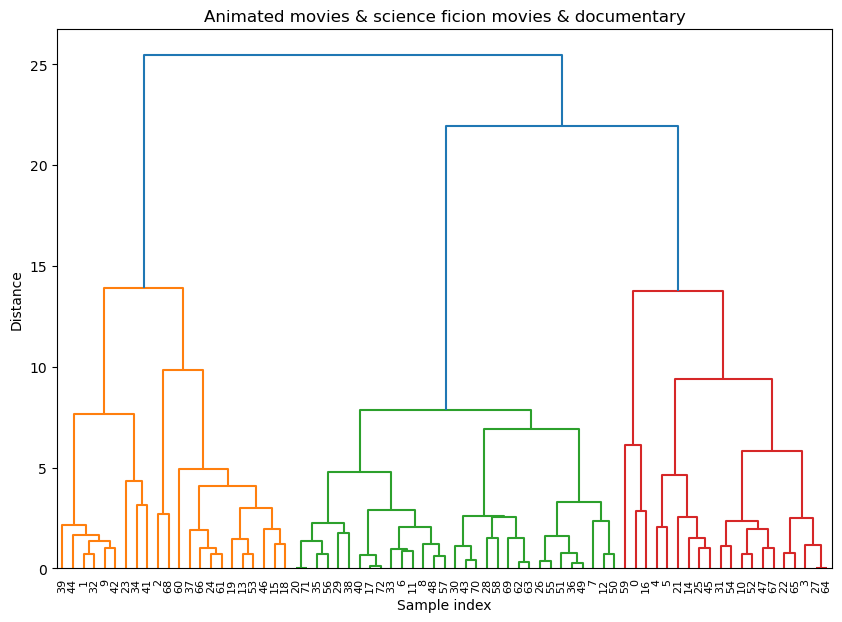

In [ ]:
# Data frame
selected_columns = [
    'Using a scale 1 to 10, how much do you like animated movies?',
    'Using a scale 1 to 10, how much do you like science fiction movies?',
    'Using a scale 1 to 10, how much do you like documentary movies?',
]
data_for_clustering = df[selected_columns]

# Check for non-numeric values
for column in selected_columns:
    if not pd.api.types.is_numeric_dtype(data_for_clustering[column]):
        data_for_clustering[column] = pd.to_numeric(data_for_clustering[column], errors='coerce')

# Drop rows with NaN values
data_for_clustering = data_for_clustering.dropna()

Z = linkage(data_for_clustering, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title('Animated movies & science ficion movies & documentary')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
)



plt.show()


# k-means

In [ ]:
dfK = np.array(df[["Using a scale 1 to 10, how much do you like animated movies?", "Using a scale 1 to 10, how much do you like science fiction movies?",
    "Using a scale 1 to 10, how much do you like documentary movies?",]])

In [ ]:
# Looks like make k = 3 is profer
k = 3
np.random.seed(42)
initial_centers = np.random.choice(len(dfK), k, replace=False)
centroids = dfK[initial_centers]

In [ ]:
distances = np.linalg.norm(dfK[:, np.newaxis]- centroids, axis=2)
cluster_assign = np.argmin(distances, axis = 1)
cluster_assign

new_centroids = np.zeros((k, dfK.shape[1]))
for cluster_index in range(k):
  cluster_points = dfK[cluster_assign == cluster_index]
  if len(cluster_points)>0:
    new_centroids[cluster_index] = cluster_points.mean(axis = 0)
centroids = new_centroids

# Supervised or Unsupervised

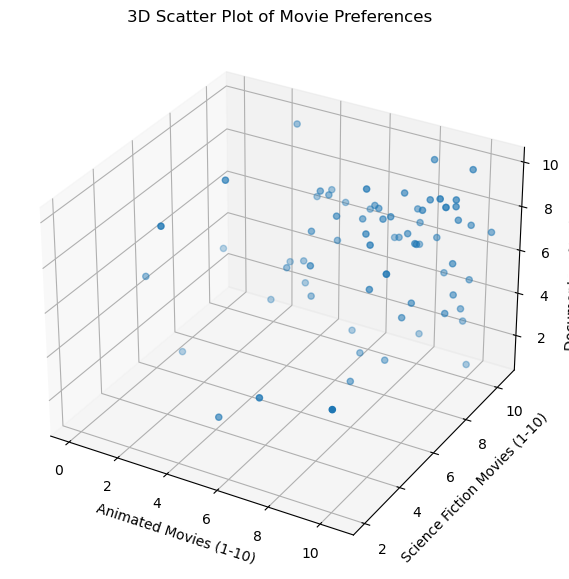

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data frame
df_selected = df[['Using a scale 1 to 10, how much do you like animated movies?',
                  'Using a scale 1 to 10, how much do you like science fiction movies?',
                  'Using a scale 1 to 10, how much do you like documentary movies?']]

df_selected = df_selected.dropna().apply(pd.to_numeric, errors='coerce')

# 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_selected.iloc[:, 0], df_selected.iloc[:, 1], df_selected.iloc[:, 2])

ax.set_xlabel('Animated Movies (1-10)')
ax.set_ylabel('Science Fiction Movies (1-10)')
ax.set_zlabel('Documentary Movies (1-10)')

# Title
ax.set_title('3D Scatter Plot of Movie Preferences')

plt.show()


# Dendrogram 2

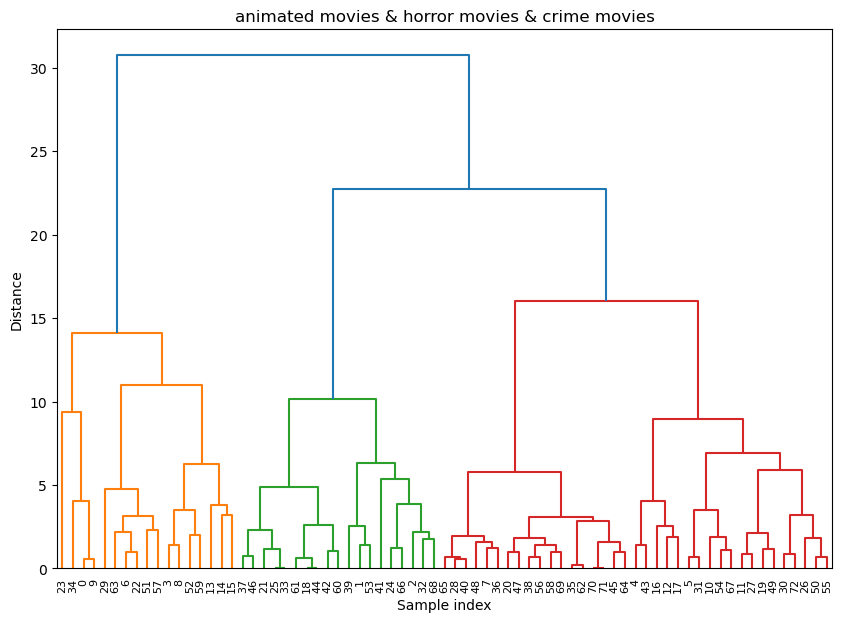

In [ ]:
# Data frame
selected_columns = [
    'Using a scale 1 to 10, how much do you like animated movies?',
    'Using a scale 1 to 10, how much do you like horror movies?',
    'Using a scale 1 to 10, how much do you like crime movies? (use decimals, e.g. 4.2)',
]

data_for_clustering = df[selected_columns]

for column in selected_columns:
    if not pd.api.types.is_numeric_dtype(data_for_clustering[column]):
        data_for_clustering[column] = pd.to_numeric(data_for_clustering[column], errors='coerce')

# Drop rows with NaN values
data_for_clustering = data_for_clustering.dropna()

# Generate the linkage matrix
Z = linkage(data_for_clustering, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title('animated movies & horror movies & crime movies')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.show()

In [ ]:
dfK = np.array(df[['Using a scale 1 to 10, how much do you like animated movies?', 'Using a scale 1 to 10, how much do you like horror movies?',
'Using a scale 1 to 10, how much do you like crime movies? (use decimals, e.g. 4.2)',]])

In [ ]:
# It looks k = 3 is profer too.
k = 3
np.random.seed(42)
initial_centers = np.random.choice(len(dfK), k, replace=False)
centroids = dfK[initial_centers]

In [ ]:
distances = np.linalg.norm(dfK[:, np.newaxis]- centroids, axis=2)
cluster_assign = np.argmin(distances, axis = 1)
cluster_assign

new_centroids = np.zeros((k, dfK.shape[1]))
for cluster_index in range(k):
  cluster_points = dfK[cluster_assign == cluster_index]
  if len(cluster_points)>0:
    new_centroids[cluster_index] = cluster_points.mean(axis = 0)
centroids = new_centroids

# Supervised or Unsupervised 2

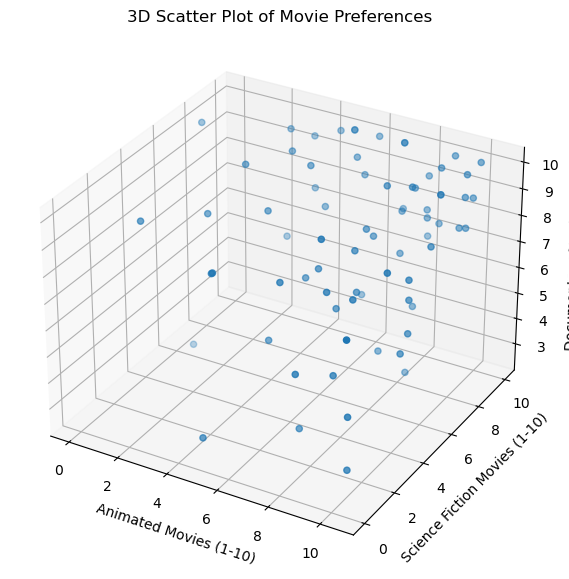

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data frame
df_selected = df[['Using a scale 1 to 10, how much do you like animated movies?',
    'Using a scale 1 to 10, how much do you like horror movies?',
    'Using a scale 1 to 10, how much do you like crime movies? (use decimals, e.g. 4.2)']]

df_selected = df_selected.dropna().apply(pd.to_numeric, errors='coerce')

# 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_selected.iloc[:, 0], df_selected.iloc[:, 1], df_selected.iloc[:, 2])

ax.set_xlabel('Animated Movies (1-10)')
ax.set_ylabel('Science Fiction Movies (1-10)')
ax.set_zlabel('Documentary Movies (1-10)')

# Title
ax.set_title('3D Scatter Plot of Movie Preferences')

plt.show()

# Prediction


In [ ]:
import numpy as np

# ... (Your previous code for setting up clustering)

# K-Means
def run_k_means(dfK, centroids, iterations=10):
    for _ in range(iterations):

        distances = np.linalg.norm(dfK[:, np.newaxis] - centroids, axis=2)
        cluster_assign = np.argmin(distances, axis=1)


        new_centroids = np.array([dfK[cluster_assign == i].mean(axis=0) for i in range(k)])


        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, cluster_assign

final_centroids, final_cluster_assign = run_k_means(dfK, centroids, 10)

# Prediction function
def predict_cluster(preferences, centroids):
    """
    Predicts the cluster for new student preferences.

    :param preferences: A list of preferences [animated, science_fiction, documentary].
    :param centroids: The centroids of the clusters.
    :return: Cluster assignment.
    """
    distances = np.linalg.norm(np.array(preferences) - centroids, axis=1)
    cluster = np.argmin(distances)
    return cluster

# Example of running the prediction function with new student preferences
# Replace these with the actual preferences you want to test
for _ in range(10):
    random_preferences = np.random.rand(3) * 10
    cluster = predict_cluster(random_preferences, final_centroids)
    print(f"Student preferences {random_preferences} belong to cluster {cluster}")


Student preferences [8.44533849 7.4732011  5.39692132] belong to cluster 0
Student preferences [5.86751166 9.65255307 6.07034248] belong to cluster 2
Student preferences [2.75999182 2.96273506 1.65266939] belong to cluster 0
Student preferences [0.15636407 4.23401481 3.94881518] belong to cluster 0
Student preferences [2.93488175 0.14079823 1.98842404] belong to cluster 0
Student preferences [7.11341953 7.90175541 6.05959975] belong to cluster 2
Student preferences [9.26300879 6.51077026 9.14959676] belong to cluster 2
Student preferences [8.50038578 4.49450674 0.95410116] belong to cluster 0
Student preferences [3.70818252 6.68841253 6.65922357] belong to cluster 2
Student preferences [5.91297788 2.74721793 5.61243426] belong to cluster 0


# Summary

It can be seen that the preference of animation and that of science films and documentaries are similar.
It can be seen that there is not much difference in preference for animation, horror movies, and crime movies. Therefore, watching animation does not mean that I hate horror movies or crime movies.

![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)

# Recommendations

I would like to recommend a movie for everyone to enjoy for 'Masters Students' Movie Night'. There is a prejudice that animation lovers do not enjoy scary, gross, and attention-seeking movies. Therefore, a preference survey was conducted to select a movie that everyone could enjoy, but it was confirmed that the difference in preference was not significant even though it was a movie of different genres.
Therefore, I want to choose the movie that the most people like to select.

In [ ]:
# Let's figure out which movie genre have a highest average movie

numeric_df = df.select_dtypes(include=[np.number])

# averages each column
averages = numeric_df.mean()

sorted_averages = averages.sort_values(ascending=False)

print(sorted_averages)

Using a scale 1 to 10, how much do you like comedy movies? (use decimals, e.g. 4.2)       8.515464
Using a scale 1 to 10, how much do you like science fiction movies?                       8.469178
Using a scale 1 to 10, how much do you like action movies? (use decimals, e.g. 4.2)       8.131507
Using a scale 1 to 10, how much do you like thriller movies?                              8.103973
Using a scale 1 to 10, how much do you like adventure movies? (use decimals, e.g. 4.2)    8.005205
Using a scale 1 to 10, how much do you like crime movies? (use decimals, e.g. 4.2)        7.913973
Using a scale 1 to 10, how much do you like mystery movies?                               7.906849
Using a scale 1 to 10, how much do you like fantasy movies?                               7.503288
Using a scale 1 to 10, how much do you like romance movies?                               7.111233
Using a scale 1 to 10, how much do you like animated movies?                              7.099863
Using a sc

From the above results, it is confirmed that the average score of comedy movies is the highest at 8.51. Therefore, choosing a comedy movie would be a good choice. However, it is highly likely that many students have already watched it because it is a highly preferred genre.


The following is a movie that comes out when you search Top 3 Hidden Comedy Movies Masterpieces.
> 'Top Secret!' (1984)

> 'Tucker & Dale vs. Evil' (2010)

> 'Rat Race' (2001)


Therefore, I recommend choosing a movie out of these.
Happy Movie night !!!